# Loading libraries

In [1]:
library(plyr)
library(dplyr)


Attaching package: 'dplyr'

The following objects are masked from 'package:plyr':

    arrange, count, desc, failwith, id, mutate, rename, summarise,
    summarize

The following objects are masked from 'package:stats':

    filter, lag

The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union



In [2]:
library(arules)

Loading required package: Matrix

Attaching package: 'arules'

The following object is masked from 'package:dplyr':

    recode

The following objects are masked from 'package:base':

    abbreviate, write



In [3]:
bd=read.csv('C://Users//Harsh Darji//Downloads//bankdata_csv_all.csv')

In [4]:
str(bd)

'data.frame':	600 obs. of  12 variables:
 $ id         : Factor w/ 600 levels "ID12101","ID12102",..: 1 2 3 4 5 6 7 8 9 10 ...
 $ age        : int  48 40 51 23 57 57 22 58 37 54 ...
 $ sex        : Factor w/ 2 levels "FEMALE","MALE": 1 2 1 1 1 1 2 2 1 2 ...
 $ region     : Factor w/ 4 levels "INNER_CITY","RURAL",..: 1 4 1 4 2 4 2 4 3 4 ...
 $ income     : num  17546 30085 16575 20375 50576 ...
 $ married    : Factor w/ 2 levels "NO","YES": 1 2 2 2 2 2 1 2 2 2 ...
 $ children   : int  1 3 0 3 0 2 0 0 2 2 ...
 $ car        : Factor w/ 2 levels "NO","YES": 1 2 2 1 1 1 1 2 2 2 ...
 $ save_act   : Factor w/ 2 levels "NO","YES": 1 1 2 1 2 2 1 2 1 2 ...
 $ current_act: Factor w/ 2 levels "NO","YES": 1 2 2 2 1 2 2 2 1 2 ...
 $ mortgage   : Factor w/ 2 levels "NO","YES": 1 2 1 1 1 1 1 1 1 1 ...
 $ pep        : Factor w/ 2 levels "NO","YES": 2 1 1 1 1 2 2 1 1 1 ...


In [5]:
# Then the first step of conversion: discretization and numeric-to-nominal transformation.

In [6]:
## Discretize age by customized bin

In [7]:
bd$age <- cut(bd$age, breaks = c(0,10,20,30,40,50,60,Inf),labels=c("child","teens","twenties","thirties","fourties","fifties","old"))

In [8]:
## Discretize income by equal-width bin

In [9]:
min_income <- min(bd$income)
max_income <- max(bd$income)
bins = 3 
width=(max_income - min_income)/bins;
bd$income = cut(bd$income, breaks=seq(min_income, max_income, width))


In [10]:
#Convert numeric to nominal for "children"

In [11]:
bd$children=factor(bd$children)

In [12]:
#Now the second step of conversion, changing "YES" to "[variable_name]=YES".

In [13]:
bd$married=dplyr::recode(bd$married, YES="married=YES", NO="married=NO")
bd$car=dplyr::recode(bd$car, YES="car=YES", NO="car=NO")
bd$save_act=dplyr::recode(bd$save_act, YES="save_act=YES", NO="save_act=NO")
bd$current_act=dplyr::recode(bd$current_act, YES="current_act=YES", NO="current_act=NO")
bd$mortgage=dplyr::recode(bd$mortgage, YES="mortgage=YES", NO="mortgage=NO")
bd$pep=dplyr::recode(bd$pep, YES="pep=YES", NO="pep=NO")


In [14]:
myRules = apriori(bd, parameter = list(supp = 0.001, conf = 0.9, maxlen = 3))

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.9    0.1    1 none FALSE            TRUE       5   0.001      1
 maxlen target   ext
      3  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 0 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[631 item(s), 600 transaction(s)] done [0.00s].
sorting and recoding items ... [631 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 2 3

Warning message in apriori(bd, parameter = list(supp = 0.001, conf = 0.9, maxlen = 3)):
"Mining stopped (maxlen reached). Only patterns up to a length of 3 returned!"

 done [0.01s].
writing ... [72691 rule(s)] done [0.01s].
creating S4 object  ... done [0.01s].


In [15]:
head(bd)

id,age,sex,region,income,married,children,car,save_act,current_act,mortgage,pep
ID12101,fourties,FEMALE,INNER_CITY,"(5.01e+03,2.44e+04]",married=NO,1,car=NO,save_act=NO,current_act=NO,mortgage=NO,pep=YES
ID12102,thirties,MALE,TOWN,"(2.44e+04,4.38e+04]",married=YES,3,car=YES,save_act=NO,current_act=YES,mortgage=YES,pep=NO
ID12103,fifties,FEMALE,INNER_CITY,"(5.01e+03,2.44e+04]",married=YES,0,car=YES,save_act=YES,current_act=YES,mortgage=NO,pep=NO
ID12104,twenties,FEMALE,TOWN,"(5.01e+03,2.44e+04]",married=YES,3,car=NO,save_act=NO,current_act=YES,mortgage=NO,pep=NO
ID12105,fifties,FEMALE,RURAL,"(4.38e+04,6.31e+04]",married=YES,0,car=NO,save_act=YES,current_act=NO,mortgage=NO,pep=NO
ID12106,fifties,FEMALE,TOWN,"(2.44e+04,4.38e+04]",married=YES,2,car=NO,save_act=YES,current_act=YES,mortgage=NO,pep=YES


In [16]:
bd<-bd[-c(1)]

In [17]:
head(bd)

age,sex,region,income,married,children,car,save_act,current_act,mortgage,pep
fourties,FEMALE,INNER_CITY,"(5.01e+03,2.44e+04]",married=NO,1,car=NO,save_act=NO,current_act=NO,mortgage=NO,pep=YES
thirties,MALE,TOWN,"(2.44e+04,4.38e+04]",married=YES,3,car=YES,save_act=NO,current_act=YES,mortgage=YES,pep=NO
fifties,FEMALE,INNER_CITY,"(5.01e+03,2.44e+04]",married=YES,0,car=YES,save_act=YES,current_act=YES,mortgage=NO,pep=NO
twenties,FEMALE,TOWN,"(5.01e+03,2.44e+04]",married=YES,3,car=NO,save_act=NO,current_act=YES,mortgage=NO,pep=NO
fifties,FEMALE,RURAL,"(4.38e+04,6.31e+04]",married=YES,0,car=NO,save_act=YES,current_act=NO,mortgage=NO,pep=NO
fifties,FEMALE,TOWN,"(2.44e+04,4.38e+04]",married=YES,2,car=NO,save_act=YES,current_act=YES,mortgage=NO,pep=YES


In [18]:
rules<-apriori(bd, parameter = list(supp = 0.25, conf = 0.7))

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.7    0.1    1 none FALSE            TRUE       5    0.25      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 150 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[31 item(s), 600 transaction(s)] done [0.00s].
sorting and recoding items ... [18 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 2 3 4 done [0.00s].
writing ... [44 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


In [19]:
summary(rules)

set of 44 rules

rule length distribution (lhs + rhs):sizes
 1  2  3 
 1 19 24 

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  1.000   2.000   3.000   2.523   3.000   3.000 

summary of quality measures:
    support         confidence          lift            count      
 Min.   :0.2517   Min.   :0.7011   Min.   :0.9645   Min.   :151.0  
 1st Qu.:0.2692   1st Qu.:0.7304   1st Qu.:0.9976   1st Qu.:161.5  
 Median :0.3192   Median :0.7516   Median :1.0161   Median :191.5  
 Mean   :0.3430   Mean   :0.7492   Mean   :1.0261   Mean   :205.8  
 3rd Qu.:0.3688   3rd Qu.:0.7675   3rd Qu.:1.0377   3rd Qu.:221.2  
 Max.   :0.7583   Max.   :0.8182   Max.   :1.2397   Max.   :455.0  

mining info:
 data ntransactions support confidence
   bd           600    0.25        0.7

In [20]:
options(digits=3)

In [21]:
rules<-sort(rules,decreasing=TRUE, by="lift")

In [22]:
inspect(rules[1:10])

     lhs                              rhs                           support confidence lift count
[1]  {mortgage=mortgage=NO,                                                                      
      pep=pep=NO}                  => {married=married=YES}           0.285      0.818 1.24   171
[2]  {save_act=save_act=YES,                                                                     
      pep=pep=NO}                  => {married=married=YES}           0.292      0.745 1.13   175
[3]  {pep=pep=NO}                  => {married=married=YES}           0.403      0.742 1.12   242
[4]  {current_act=current_act=YES,                                                               
      pep=pep=NO}                  => {married=married=YES}           0.295      0.725 1.10   177
[5]  {married=married=YES,                                                                       
      pep=pep=NO}                  => {mortgage=mortgage=NO}          0.285      0.707 1.08   171
[6]  {current_act=cu

In [23]:

plot(rules[1:10],method="graph")

ERROR: Error in plot.associations(rules[1:10], method = "graph"): Needed package 'arulesViz' not installed or loaded!


In [24]:
#Pep Analysis

In [25]:
peprules <- apriori(bd, parameter = list(maxlen = 4), appearance = list(rhs = c("pep=pep=YES", 
    "pep=pep=NO")))

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5     0.1      1
 maxlen target   ext
      4  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 60 

set item appearances ...[2 item(s)] done [0.00s].
set transactions ...[31 item(s), 600 transaction(s)] done [0.00s].
sorting and recoding items ... [30 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 2 3 4

Warning message in apriori(bd, parameter = list(maxlen = 4), appearance = list(rhs = c("pep=pep=YES", :
"Mining stopped (maxlen reached). Only patterns up to a length of 4 returned!"

 done [0.00s].
writing ... [10 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


In [26]:
inspect(peprules)

     lhs                              rhs           support confidence lift count
[1]  {children=1}                  => {pep=pep=YES}   0.183      0.815 1.78   110
[2]  {children=1,                                                                
      mortgage=mortgage=NO}        => {pep=pep=YES}   0.118      0.845 1.85    71
[3]  {married=married=YES,                                                       
      children=1}                  => {pep=pep=YES}   0.123      0.831 1.82    74
[4]  {children=1,                                                                
      save_act=save_act=YES}       => {pep=pep=YES}   0.133      0.842 1.84    80
[5]  {children=1,                                                                
      current_act=current_act=YES} => {pep=pep=YES}   0.140      0.832 1.82    84
[6]  {children=1,                                                                
      save_act=save_act=YES,                                                     
      current_ac

In [27]:
myrules<-sort(peprules,decreasing=TRUE, by="lift")

In [28]:
inspect(myrules)

     lhs                              rhs           support confidence lift count
[1]  {children=1,                                                                
      save_act=save_act=YES,                                                     
      current_act=current_act=YES} => {pep=pep=YES}   0.105      0.863 1.89    63
[2]  {children=1,                                                                
      mortgage=mortgage=NO}        => {pep=pep=YES}   0.118      0.845 1.85    71
[3]  {children=1,                                                                
      save_act=save_act=YES}       => {pep=pep=YES}   0.133      0.842 1.84    80
[4]  {children=1,                                                                
      current_act=current_act=YES} => {pep=pep=YES}   0.140      0.832 1.82    84
[5]  {married=married=YES,                                                       
      children=1}                  => {pep=pep=YES}   0.123      0.831 1.82    74
[6]  {children=1

In [29]:
require(arulesViz)

Loading required package: arulesViz
Loading required package: grid


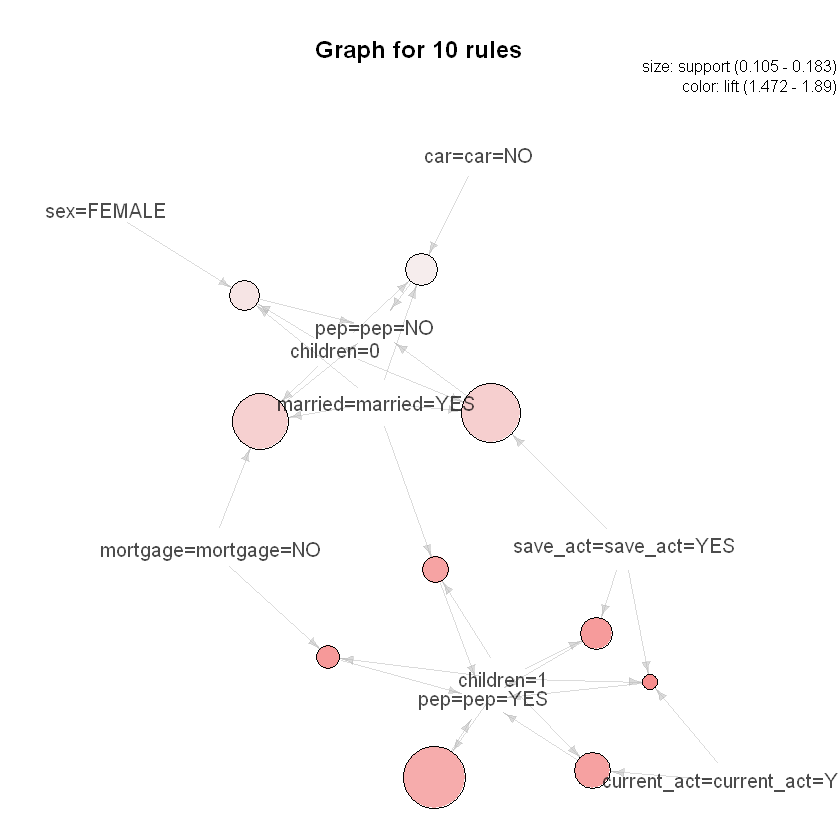

In [30]:
plot(myrules[1:10], method = "graph")

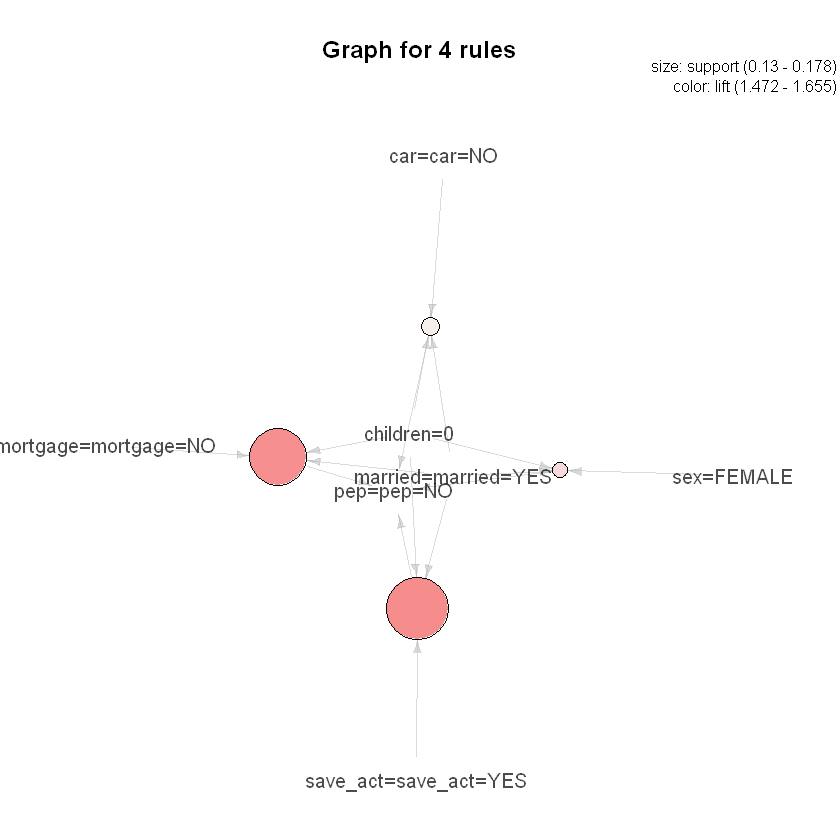

In [32]:
plot(myrules[7:10], method = "graph")

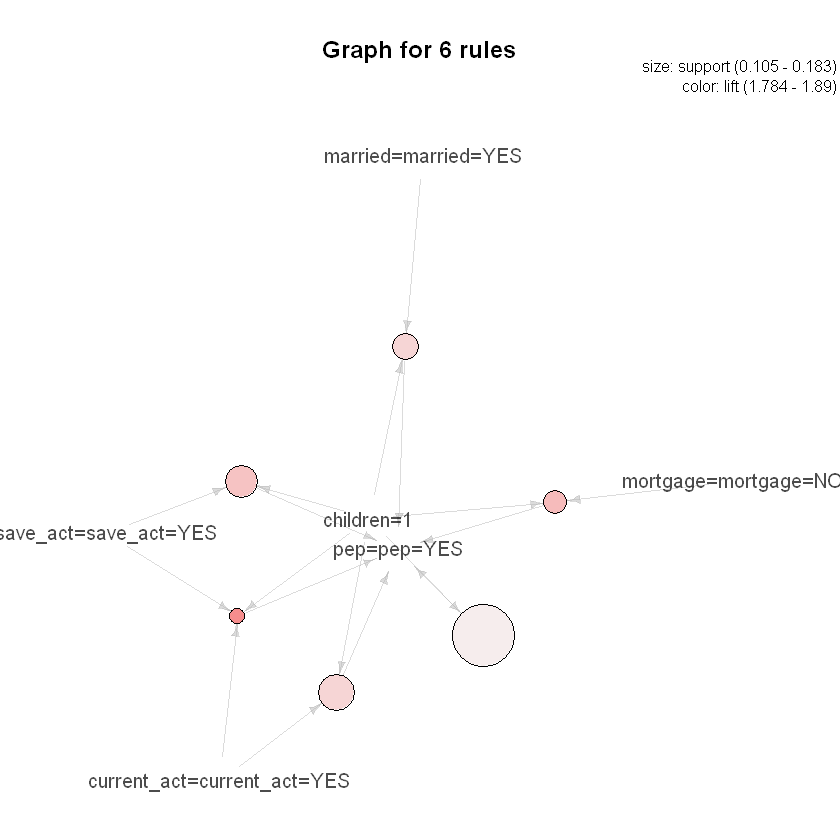

In [33]:
plot(myrules[1:6], method = "graph")